In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
#importing all the libararies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#importing the training data and the testing data
train_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [9]:
#checking the head of the training data to see what is given
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

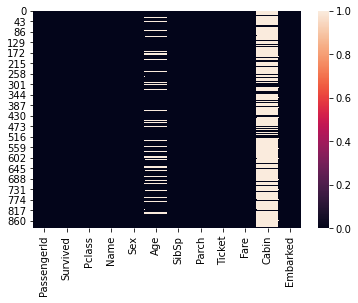

In [10]:
#plotting the heat map to see which values are null
sns.heatmap(train_data.isnull())


In [11]:
sns.set_style('whitegrid')

In [7]:
#checking the number of null values in the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

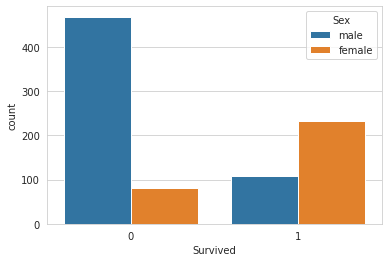

In [8]:
#making a countplot to see the ratio in sex of survival
sns.countplot(x='Survived',hue='Sex',data=train_data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

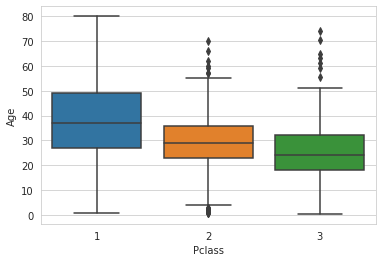

In [9]:
#few age columns are missing therefore using boxplot to find the average of people
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [10]:
#assigning average of ages of each Pclass to null values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [11]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
#Cabin column has huge number of null values therefore not using that data set
train_data.drop('Cabin',inplace = True, axis =1)
test_data.drop('Cabin',inplace = True, axis =1)

In [13]:
#assigining numeric/binomial values to Sex and Embarked on train and test data
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
train_data= pd.concat([train_data,sex,embark],axis=1)
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [14]:
sex = pd.get_dummies(test_data['Sex'],drop_first=True)
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data= pd.concat([test_data,sex,embark],axis=1)
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  male         418 non-null    uint8  
 11  Q            418 non-null    uint8  
 12  S            418 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(3)
memory usage: 34.0+ KB


In [15]:
#Removing the columns with no numeric values
train_data.drop(['Sex','PassengerId','Name','Ticket','Embarked'],inplace =True,axis=1)

In [16]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
test_data.drop(['Sex','PassengerId','Name','Ticket','Embarked'],inplace =True,axis=1)

In [18]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [20]:
x=train_data.drop('Survived',axis=1)

In [21]:
y=train_data['Survived']

In [22]:
#splitting training data into training set and cross validation set
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_cvtest,y_train,y_cvtest = train_test_split(x,y,test_size=0.3,random_state=101)

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression(solver = 'liblinear')

In [26]:
logmodel.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [27]:
predictions = logmodel.predict(x_cvtest)

In [28]:
#checking errors
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_cvtest,predictions))
print(confusion_matrix(y_cvtest,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[133  21]
 [ 40  74]]


In [30]:
#in test data Fare column has one null value so filling it with mean of that column
test_data['Fare'].fillna(value=test_data['Fare'].mean(),inplace = True)

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


<AxesSubplot:>

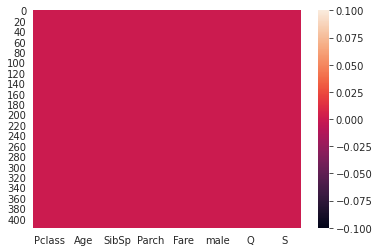

In [32]:
#checking if any null value left
sns.heatmap(test_data.isnull())

In [33]:
answer = logmodel.predict(test_data)

In [34]:
#submit
p = pd.read_csv('/kaggle/input/titanic/test.csv')
output = pd.DataFrame({'PassengerId': p.PassengerId, 'Survived': answer})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
